In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [65]:
df=pd.read_csv("student.csv")

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
#add column of total score and average
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
#show
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
x=df.iloc[:,:-1]
y=df['average_score']

In [69]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [ 
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),


    ]



)

In [70]:
x=preprocessor.fit_transform(x)

In [74]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  0.19399858,
         0.39149181,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.42747598,
         1.31326868,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.77010859,
         1.64247471,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.12547206,
        -0.20107904, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.60515772,
         0.58901542,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.15336989,
         1.18158627,  1.06871048]])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [76]:
print(x_train.shape)
print(x_test.shape)

(750, 21)
(250, 21)


In [79]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [96]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training set :")
    print("- root mean squared error : ",model_train_rmse)
    print("- mean absolute error : ",model_train_mae)
    print("- r2 score : ",model_train_r2)

    print("----------------------------------")

    print("model performance for test set :")
    print("- root mean squared error : ",model_test_rmse)
    print("- mean absolute error : ",model_test_mae)
    print("- r2 score : ",model_test_r2)
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")



Linear Regression
model performance for training set :
- root mean squared error :  1.2889383626404548e-14
- mean absolute error :  9.67285510948083e-15
- r2 score :  1.0
----------------------------------
model performance for test set :
- root mean squared error :  1.3008948930457572e-14
- mean absolute error :  9.606537787476555e-15
- r2 score :  1.0


Lasso
model performance for training set :
- root mean squared error :  1.0208196595399677
- mean absolute error :  0.8196979380621712
- r2 score :  0.9946524549243604
----------------------------------
model performance for test set :
- root mean squared error :  1.1065553099444367
- mean absolute error :  0.8651700062115342
- r2 score :  0.9945269388692881


Ridge
model performance for training set :
- root mean squared error :  0.00629813611911668
- mean absolute error :  0.005094032990440544
- r2 score :  0.9999997964456028
----------------------------------
model performance for test set :
- root mean squared error :  0.006989442

In [102]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'r2 score']).sort_values(by=["r2 score"],ascending=False)

,Model Name,r2 score
0,Linear Regression,1.000000
2,Ridge,1.000000
4,Random Forest Regressor,0.996025
5,XGBRegressor,0.995938
6,CatBoosting Regressor,0.995366
1,Lasso,0.994527
7,AdaBoost Regressor,0.992834
3,K-Neighbors Regressor,0.967974


In [104]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.60


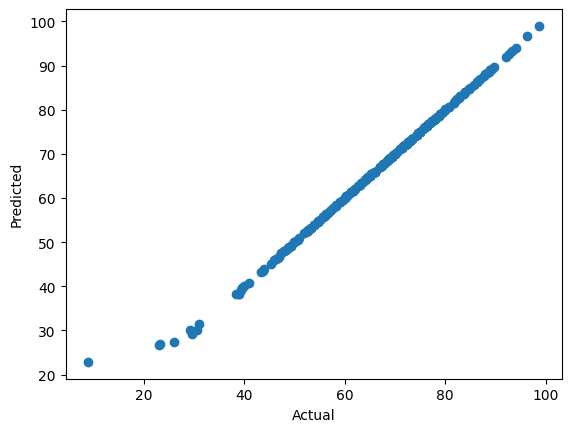

In [105]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

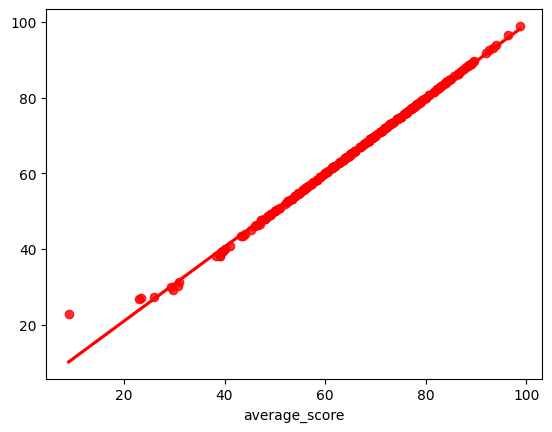

In [106]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [107]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,87.016667,-1.666667e-02
737,64.000000,63.996667,3.333333e-03
740,75.000000,75.010000,-1.000000e-02
660,74.666667,74.660000,6.666667e-03
411,81.666667,81.520000,1.466667e-01
...,...,...,...
109,68.666667,68.666667,-8.526513e-14
430,63.000000,62.960000,4.000000e-02
77,79.666667,79.723333,-5.666667e-02
84,38.333333,38.253333,8.000000e-02
